# Data Analysis (part 9)

## What proportion of classes get over a 3 rating on the 4-point scale?
* When considering what to major in, a freshman or sophomore may be curious what proportion of a department's classes get high-quality ratings along key variables.


In [1]:
%matplotlib inline

import json
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import requests
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import plotly_express as px
import math
import plotly

In [2]:
# loading the cleaned data back in 
comm_revs_df2 = pd.read_csv('../data/clean_data/comm_revs_df2')
df_new2 = pd.read_csv('../data/clean_data/df_new2')

In [3]:
#what percent of COMM classes have course quality over 3:
comm_over3 = comm_revs_df2[comm_revs_df2['CourseQuality']>3]
comm_over3.shape[0]/comm_revs_df2.shape[0]

0.49605263157894736

Just about half of COMM courses received in the top tier for course quality. That's pretty good, but how does it compare to other departments?

In [4]:
#goal: to generate a chart for each department and each variable
#we will have to use a double loop

popular = ['PSCI','COMM','HIST','ECON','PSYC']
variables = ['CourseQuality', 'InstructorQuality', 'AmountLearned', 'Difficulty', 'StimulateInterest', 'WorkRequired']

over3_props = pd.DataFrame()
over3_props['department'] = popular

for var in variables:
    props = []
    for dept in popular:
        over = (df_new2[(df_new2[var] > 2.99) & (df_new2['department'] == dept)]).shape[0]
        total = df_new2[df_new2['department'] == dept].shape[0]
        prop = over/total
        props.append(prop)
    over3_props[var] = props
    
over3_props

,department,CourseQuality,InstructorQuality,AmountLearned,Difficulty,StimulateInterest,WorkRequired
0,PSCI,0.605976,0.745657,0.391939,0.204309,0.661571,0.310632
1,COMM,0.547425,0.707317,0.502710,0.117886,0.560976,0.169377
2,HIST,0.622883,0.783982,0.406407,0.140046,0.666819,0.278719
3,ECON,0.175000,0.345968,0.158871,0.258065,0.226613,0.099194
4,PSYC,0.518639,0.696921,0.344408,0.085089,0.624797,0.132091


#### Findings from the above:
* COMM has highest proportion of courses given over 3 for amount learned
* PSCI and then ECON have the highest proportion of courses given over 3 for work required - by a large margin
* The ECON courses are not particularly popular as a collective (although there are certainly outliers) 
* The social sciences are overall pretty popular courses!

Visualizing the COMM ratings distribution for course quality in another way:

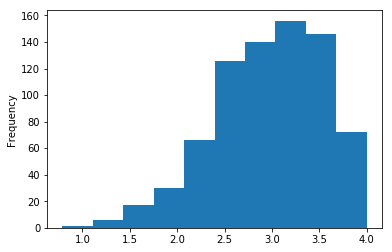

In [5]:
comm_revs_df2['CourseQuality'].plot(kind='hist')

... as compared to the total:

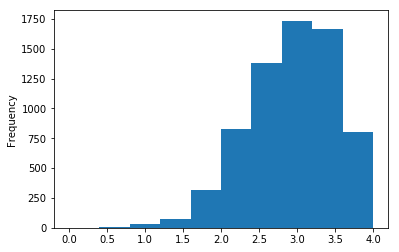

In [6]:
df_new2['CourseQuality'].plot(kind='hist')

In [7]:
dpts_distrib = df_new2[df_new2['CourseQuality']>3]
dpts_distrib.shape[0]/df_new2.shape[0]

0.4669397308367466

COMM has about 3% more (50%) courses getting over a 3 for course quality than the social sciences as a whole (47%).